In [1]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [10]:
dataset = 'simulation1a'
outputs_path = os.path.join(os.getcwd(), 'data', 'outputs', dataset)

In [15]:
prediction_error = []
for n_nodes in os.listdir(outputs_path):
    for model in os.listdir(os.path.join(outputs_path, n_nodes)):
        data = load_pickle(os.path.join(outputs_path, n_nodes, model, "results.pkl"))

        try:
            pred_df = pd.DataFrame({"pred": data['pred'], "true": data["true"]}).dropna()
        except:
            pred_df = pd.DataFrame({"pred": data['test_pred'], "true": data["test_true"]}).dropna()

        # compute aggregated mse
        mse = mean_squared_error(pred_df['true'], pred_df['pred'])
        mae = mean_absolute_error(pred_df['true'], pred_df['pred'])

        # store results
        prediction_error.append({"model": model, "dataset": dataset, "n_nodes": n_nodes, "mse": mse, "mae": mae})
prediction_error_df = pd.DataFrame(prediction_error)

In [18]:
prediction_error_df

,model,dataset,n_nodes,mse,mae
0,sdne_100_20_20,simulation1a,10,1.073137,0.869981
1,sdne_100_1_1,simulation1a,10,0.401097,0.533827
2,spectrum,simulation1a,10,0.491994,0.534809
3,sdne_20_1_1,simulation1a,10,0.410941,0.538797
4,sdne_100_20_20,simulation1a,100,0.347197,0.507120
5,sdne_100_1_1,simulation1a,100,0.343382,0.505438
6,spectrum,simulation1a,100,0.585224,0.545907
7,sdne_20_1_1,simulation1a,100,0.537673,0.601606
8,sdne_100_20_20,simulation1a,200,0.335398,0.500482
9,sdne_100_1_1,simulation1a,200,0.332522,0.500000


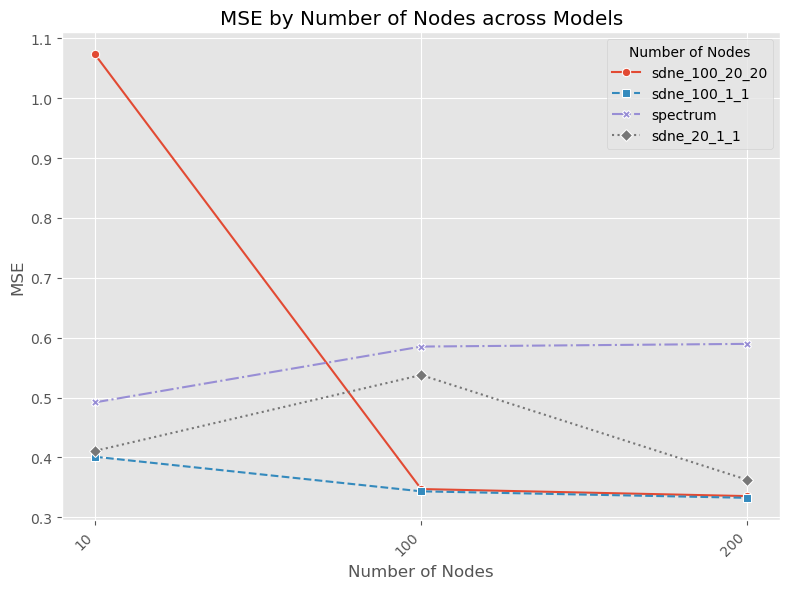

In [19]:
# Define unique line styles and markers for each model, ensure there are enough styles for each model
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'X', 'D']

plt.figure(figsize=(8, 6))  # Create a figure for the plots

# Iterate through each unique model and plot on the same graph with a unique style
for idx, model in enumerate(prediction_error_df["model"].unique()):
    # Filter the DataFrame for the current model
    model_df = prediction_error_df[prediction_error_df["model"] == model]
    
    # Plot the lineplot on the same figure with unique style and marker
    sns.lineplot(
        x='n_nodes', y='mse', data=model_df,
        label=model, linestyle=styles[idx % len(styles)], marker=markers[idx % len(markers)]
    )

plt.title('MSE by Number of Nodes across Models')  # Set the title for the entire plot
plt.xlabel('Number of Nodes')  # Set the x-axis label
plt.ylabel('MSE')  # Set the y-axis label
plt.legend(title='Number of Nodes')  # Enable the legend to distinguish models

# Rotate x labels for better fit
plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

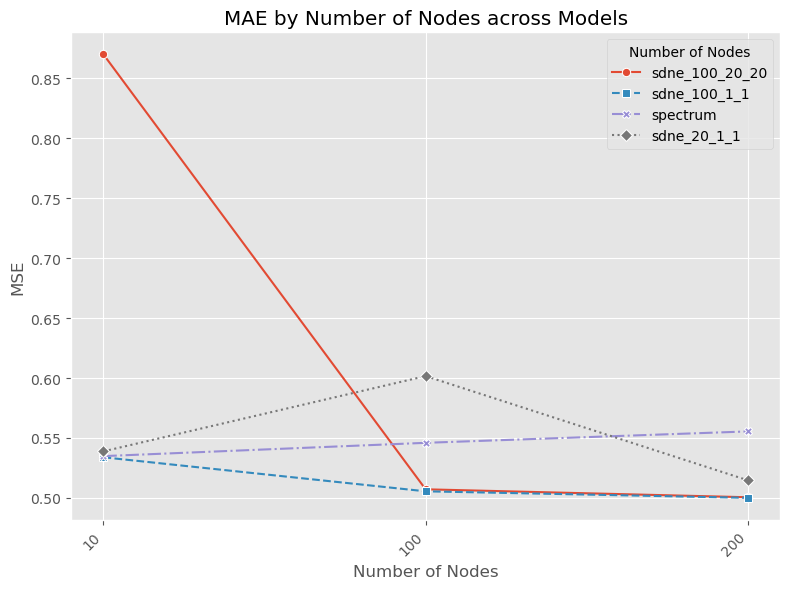

In [20]:
# Define unique line styles and markers for each model, ensure there are enough styles for each model
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'X', 'D']

plt.figure(figsize=(8, 6))  # Create a figure for the plots

# Iterate through each unique model and plot on the same graph with a unique style
for idx, model in enumerate(prediction_error_df["model"].unique()):
    # Filter the DataFrame for the current model
    model_df = prediction_error_df[prediction_error_df["model"] == model]
    
    # Plot the lineplot on the same figure with unique style and marker
    sns.lineplot(
        x='n_nodes', y='mae', data=model_df,
        label=model, linestyle=styles[idx % len(styles)], marker=markers[idx % len(markers)]
    )

plt.title('MAE by Number of Nodes across Models')  # Set the title for the entire plot
plt.xlabel('Number of Nodes')  # Set the x-axis label
plt.ylabel('MSE')  # Set the y-axis label
plt.legend(title='Number of Nodes')  # Enable the legend to distinguish models

# Rotate x labels for better fit
plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()